In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Police.csv')
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [45]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [46]:
age = np.array(data['age'])
nan_age = np.where(np.isnan(data['age']))
nan_age = nan_age[0]
# 결측값 표시

mean_age = int(np.mean(data['age']))

for i in range(len(nan_age)):
    data['age'][nan_age[i]] = mean_age

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
Gender = np.array(data['gender'])
nan_gender = np.where(data['gender'].isnull())
nan_gender = nan_gender[0]
# 결측값 표시

for i in range(len(nan_gender)):
    data['gender'][nan_gender[i]] = 'M'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [48]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                          0
gender                       0
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [60]:
race = set(data['race'])
race = list(race)

Race = np.array(data['race'])
nan_race = np.where(data['race'].isnull())
nan_race = nan_race[0]
for i in range(len(nan_race)):
    data['race'][nan_race[i]] = race[i % 6]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [58]:
del race[1]
race

['A', 'O', 'B', 'N', 'W', 'H']

In [62]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,37.0,M,O,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,B,Beach Park,IL,False,attack,Not fleeing,False


In [68]:
flee = set(data['flee'])
flee = list(flee)
del flee[0]
flee

['Other', 'Car', 'Foot', 'Not fleeing']

In [69]:
Flee = np.array(data['flee'])
nan_flee = np.where(data['flee'].isnull())
nan_flee = nan_flee[0]
for i in range(len(nan_flee)):
    data['flee'][nan_flee[i]] = [i % 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
dtype: int64

{'shot and Tasered', 'shot'}


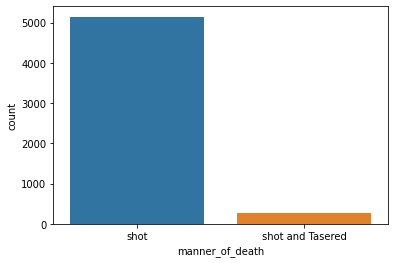

총을 쏜 비율 : 0.95
총과 테이저를 쏜 비율 : 0.05


In [85]:
# 1. Shooting rate

shot_feature = set(data['manner_of_death'])
print(shot_feature)
shooting = np.where(data['manner_of_death'] == 'shot')
shot_and_Tasered = np.where(data['manner_of_death'] == 'shot and Tasered')

import seaborn as sns

sns.countplot(x="manner_of_death",data = data)
plt.show()
print("총을 쏜 비율 :" ,np.round(len(shooting[0]) / len(data['manner_of_death']),3))
print("총과 테이저를 쏜 비율 :" ,np.round(len(shot_and_Tasered[0]) / len(data['manner_of_death']),3))

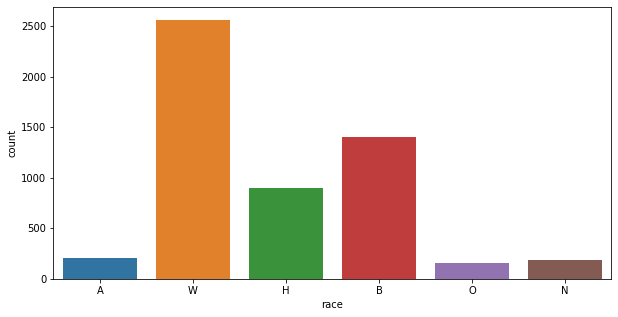

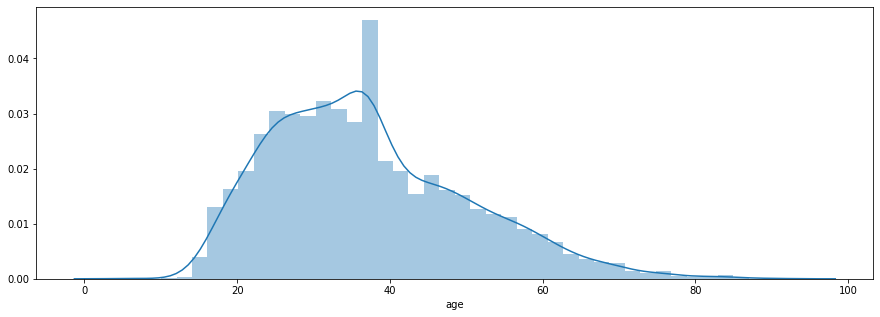

In [99]:
# What is the rate of killings relative to race and age

plt.figure(figsize=(10,5))
sns.countplot(x="race",data = data)
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(data["age"])
plt.show()

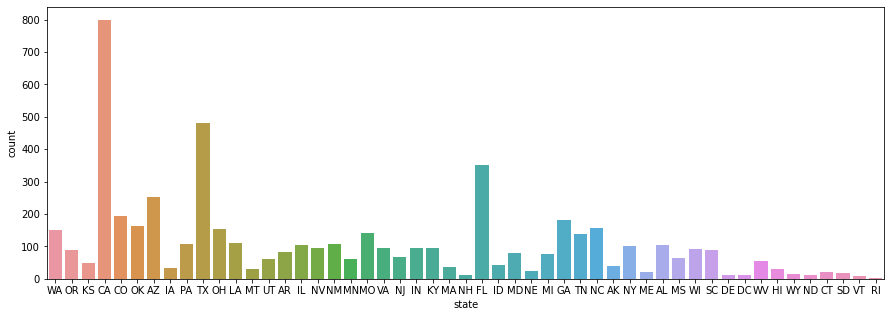

In [107]:
# Which states have the most kills
plt.figure(figsize=(15,5))
sns.countplot(x="state",data = data)
plt.show()

In [115]:
data_date = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='raise')
data['year'] = data_date.dt.year
data['month'] = data_date.dt.month
data['day'] = data_date.dt.day

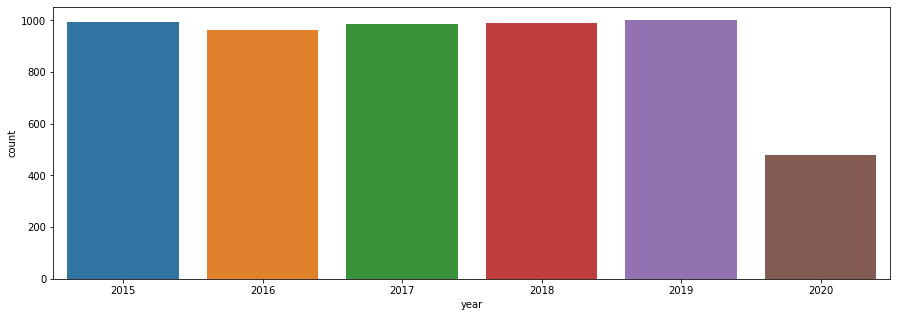

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(x="year",data = data)
plt.show()

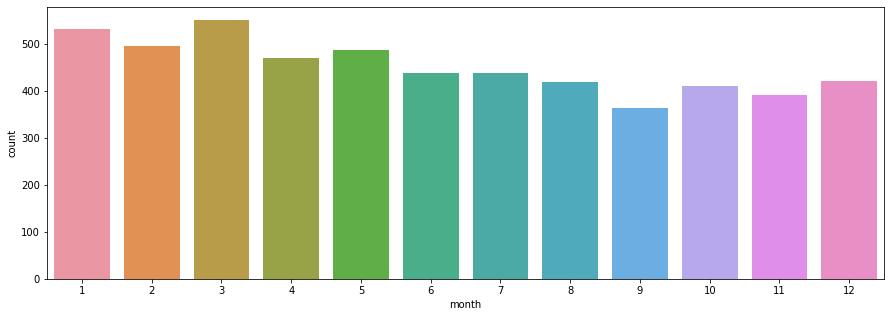

In [118]:
plt.figure(figsize=(15,5))
sns.countplot(x="month",data = data)
plt.show()

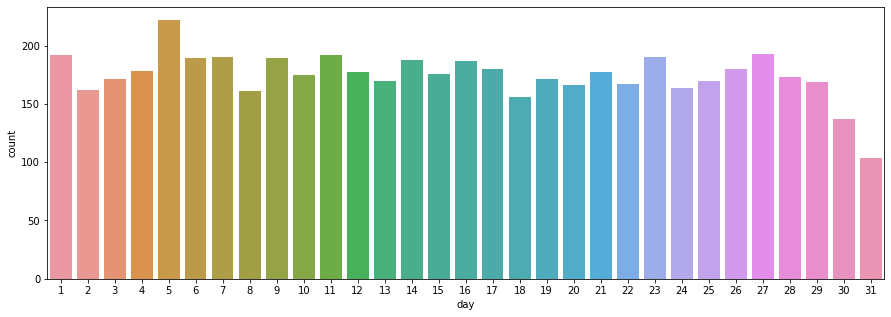

In [119]:
plt.figure(figsize=(15,5))
sns.countplot(x="day",data = data)
plt.show()

In [128]:
import plotly.express as px
 
shootout_by_armed = data['armed'].value_counts()[:94]
shootout_by_armed = pd.DataFrame(shootout_by_armed)
shootout_by_armed =shootout_by_armed.reset_index()#to arrange in descending order
fig = px.pie(shootout_by_armed, values='armed', names='index', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()